In [1]:
!pip install numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 2.9 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 3.4 MB/s eta 0:00:0000:0100:01


In [2]:
from numba import jit

# Q1

In [3]:

def bubblesort(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp

In [4]:
import numpy as np
original = np.arange(0.0, 10.0, 0.01, dtype='f4')
shuffled = original.copy()
np.random.shuffle(shuffled)

In [5]:
sorted = shuffled.copy()
bubblesort(sorted)
print(np.array_equal(sorted, original))

True


In [6]:
%timeit sorted[:] = shuffled[:]; bubblesort(sorted)


864 ms ± 150 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
#Complete the Solution to Q1 (i) here.

@jit
def bubblesort(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp

In [8]:
sorted = shuffled.copy()
bubblesort(sorted)
print(np.array_equal(sorted, original))

True


In [9]:
#Measure the time of your optimized implementation by running this cell

%timeit sorted[:] = shuffled[:]; bubblesort(sorted)

1.49 ms ± 488 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
from numba import jit, int32, float64

In [11]:
@jit(float64(float64[:]))
def bubblesort(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp

C:\Users\aasha\AppData\Local\Temp\ipykernel_37632\1385991434.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "bubblesort" failed type inference due to: No conversion from none to float64 for '$108return_value.1', defined at None

File "..\AppData\Local\Temp\ipykernel_37632\1385991434.py", line 10:
<source missing, REPL/exec in use?>

During: typing of assignment at C:\Users\aasha\AppData\Local\Temp\ipykernel_37632\1385991434.py (10)

File "..\AppData\Local\Temp\ipykernel_37632\1385991434.py", line 10:
<source missing, REPL/exec in use?>

  @jit(float64(float64[:]))
C:\Users\aasha\AppData\Local\Temp\ipykernel_37632\1385991434.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "bubblesort" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "..\AppData\Local\Temp\ipykernel_37632\1385991434.py", line 4:
<source missin

In [12]:

%timeit sorted[:] = shuffled[:]; bubblesort(sorted)

The slowest run took 4.58 times longer than the fastest. This could mean that an intermediate result is being cached.
1.61 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Q2.

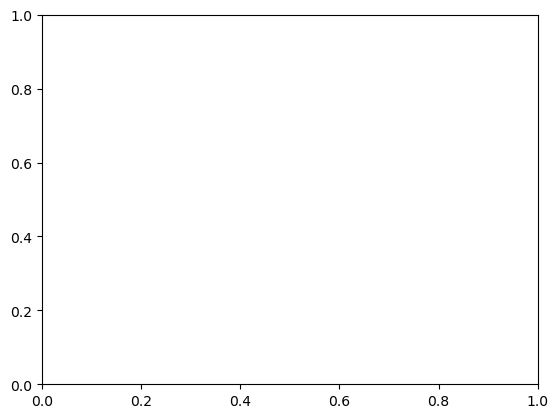

In [13]:
from scipy.stats import pareto
import matplotlib.pyplot as plt

import numpy as np
import math
from numba import vectorize,float64, cuda
from numba import jit

fig, ax = plt.subplots(1, 1)

In [14]:
b=2.62
#x = np.linspace(1.0, 5.7, 100)

x = np.linspace(1.0, 5.7, 1000000) # Taking this value will give the proper time difference.

In [15]:
#Run this cell to know the time taken by original scipy implementation.

%timeit pareto.pdf(x, b)

227 ms ± 23.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
# Write your code here for CPU_BASED optimization. Give new name as pareto_new_cpu()
@vectorize
def pareto_new_cpu(x, b):
    return (b/(x**(b+1)))


In [17]:
# Run this cell to check the performance of above implementation.

%timeit pareto_new_cpu(x,b)

114 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
# Write your code here for GPU_BASED optimization. Give new name as pareto_new_gpu()
@vectorize(['float64(float64, float64)'], target='cuda')

def pareto_new_gpu(x, b):
    return (b/(x**(b+1)))



In [19]:
# Run this cell to check the performance of above implementation.  

%timeit pareto_new_gpu(x,b)

NvvmSupportError: libNVVM cannot be found. Do `conda install cudatoolkit`:
Could not find module 'nvvm.dll' (or one of its dependencies). Try using the full path with constructor syntax.

# Q3

In [ ]:
from numba import njit

In [ ]:
# Create on device memory variables here.
d_x = cuda.to_device(x)
d_b = cuda.to_device(b)


In [ ]:
@vectorize([float64(float64, float64)])
@njit
def pareto_new(x,b):
    return (b/(x**(b+1)))

In [ ]:
%timeit pareto_new(d_x,d_b)

In [ ]:
# copy the output variable from device to host
out_host = pareto_new(d_x,d_b)


In [ ]:
out_host.shape

In [ ]:
#plot pareto new 
plt.plot(x, out_host, 'r-', lw=5, alpha=0.6, label='pareto_new')
